In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import sklearn
import tqdm
from tqdm import tqdm
import nltk
import warnings
warnings.filterwarnings("ignore") 
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Medical Report Generation Using Deeplearning/Medical Report Generation Using Deeplearning/") 

In [ ]:
print("there are {} number of reports in the data ".format(len(os.listdir("ecgen-radiology"))))
print("there are {} number of x-rays in the data ".format(len(os.listdir("NLMCXR_png")))) 

there are 3951 number of reports in the data 
there are 7495 number of x-rays in the data 


There are more number of images than the number of reports as a report can be associated with one or more x-rays. In Most cases , its 2 images per report.

Extract the findngs, impression, and indication from these xml files as reports and Also the image ids corresponding to that report

In [ ]:
#https://www.geeksforgeeks.org/xml-parsing-python/

import xml.etree.ElementTree as et
id=[]
finding=[]
count=[]
indication=[]
impression=[]

for report in tqdm(os.listdir("ecgen-radiology")):
  #create element tree object
  tree=et.parse("ecgen-radiology/"+report)
  #get the root element
  root=tree.getroot()
  #inside the root element
  for child in root:
      if child.tag == "MedlineCitation":
          for each in child:
              if each.tag == "Article":
                  for i in each:
                      if i.tag == "Abstract":
                          for j in i:

                            if j.get('Label')=='INDICATION':
                              indic=j.text
                              
                            if j.get("Label") == "FINDINGS":
                              find = j.text
                                
                            if j.get('Label')=='IMPRESSION':
                              
                              impr=j.text
                              
                                       
  image_count=0 
  for img_id in root.findall("parentImage"):
    id.append(img_id.get("id")+".png")
    finding.append(find)
    impression.append(impr)
    indication.append(indic)
    image_count+=1
  count.append(image_count)  

100%|██████████| 3951/3951 [00:55<00:00, 70.56it/s] 


In [ ]:
df=pd.DataFrame()
patient_id=[i[:-9] for i in id]
df["patient_id"]=patient_id
df["image_id"]=["NLMCXR_png/"+ i for i in id]
df["finding"]=finding
df["impression"]=impression
df["indication"]=indication
print(df.shape)
df

(7465, 5)


,patient_id,image_id,finding,impression,indication
0,CXR1964_IM-0629,NLMCXR_png/CXR1964_IM-0629-1001.png,Heart size and mediastinal contours appear wit...,No acute cardiopulmonary abnormality.,XXXX-year-old with chest pain.
1,CXR1964_IM-0629,NLMCXR_png/CXR1964_IM-0629-2001.png,Heart size and mediastinal contours appear wit...,No acute cardiopulmonary abnormality.,XXXX-year-old with chest pain.
2,CXR1982_IM-0639,NLMCXR_png/CXR1982_IM-0639-1001.png,None,Some XXXX opacities compatible with subsegment...,CLL. SOB
3,CXR1982_IM-0639,NLMCXR_png/CXR1982_IM-0639-2001.png,None,Some XXXX opacities compatible with subsegment...,CLL. SOB
4,CXR1967_IM-0629,NLMCXR_png/CXR1967_IM-0629-1001.png,Heart size and pulmonary vascularity appear wi...,1. XXXX opacities in the lingula. The appearan...,Left anterior and posterior chest pain. Dyspnea.
...,...,...,...,...,...
7460,CXR3674_IM-1829-0001,NLMCXR_png/CXR3674_IM-1829-0001-0001.png,None,No comparison chest x-XXXX. Well-expanded and ...,PAIN;...FWC
7461,CXR3674_IM-1829-0001,NLMCXR_png/CXR3674_IM-1829-0001-0002.png,None,No comparison chest x-XXXX. Well-expanded and ...,PAIN;...FWC
7462,CXR3724_IM-1860,NLMCXR_png/CXR3724_IM-1860-1001.png,Heart size normal. Lungs are clear. XXXX are n...,Normal chest.,chest pain
7463,CXR3724_IM-1860,NLMCXR_png/CXR3724_IM-1860-2001.png,Heart size normal. Lungs are clear. XXXX are n...,Normal chest.,chest pain


In [ ]:
#check the lengths of reports
length=[]
for report in df["finding"]:
  try:
    length.append(len(report.split()))
  except:
    pass
length=np.array(length)
print("the mean lengths of reports is ",np.mean(length))
print("the 80th percentile lengths of reports is ",np.percentile(length,80))
print("the 90th percentile lengths of reports is ",np.percentile(length,90))
print("the 99th percentile lengths of reports is ",np.percentile(length,99))
print("the maximum value of lengths of reports is ",np.max(length))

the mean lengths of reports is  31.306277056277057
the 80th percentile lengths of reports is  41.0
the 90th percentile lengths of reports is  50.0
the 99th percentile lengths of reports is  79.0
the maximum value of lengths of reports is  169


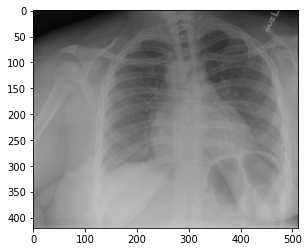

FINDINGS: None
IMPRESSION: Heart size upper limits normal. Sternotomy. Right-sided aortic XXXX. Lungs are clear.
INDICATION: History of dyspnea
****************************************************************************************************


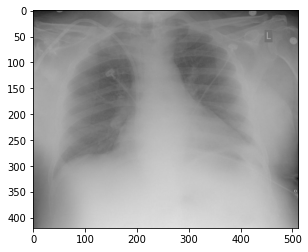

FINDINGS: None
IMPRESSION: None
INDICATION: None
****************************************************************************************************


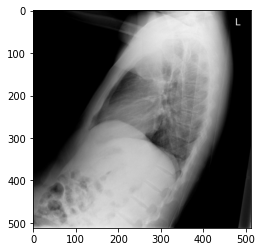

FINDINGS: Cardiomediastinal silhouette and pulmonary vasculature are within normal limits. Lungs are clear. No pneumothorax or pleural effusion. No acute osseous findings.
IMPRESSION: No acute cardiopulmonary findings.
INDICATION: XXXX, XXXX vehicle collision
****************************************************************************************************


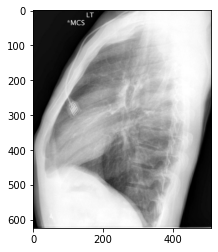

FINDINGS: Heart size normal. No focal airspace disease. No pneumothorax or effusions.
IMPRESSION: No acute cardiopulmonary findings.
INDICATION: XXXX-year-old male with chest pain.
****************************************************************************************************


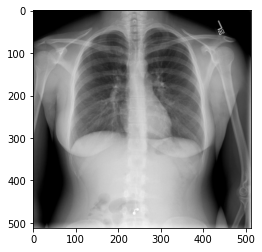

FINDINGS: Normal heart size and mediastinal contours. Clear lungs. No pneumothorax or pleural effusion. Unremarkable XXXX.
IMPRESSION: No acute cardiopulmonary process. .
INDICATION: Difficulty breathing.
****************************************************************************************************


In [ ]:
#print some sample x-rays and findings
temp=np.random.choice(range(7470),5)
for each in temp:
  img=cv2.imread(df.iloc[each]["image_id"])
  plt.imshow(img)
  plt.show()
  print("FINDINGS:",df.iloc[each]["finding"])
  print("IMPRESSION:",df.iloc[each]["impression"])
  print("INDICATION:",df.iloc[each]["indication"])
  print("*"*100)

In [ ]:
#finding the number of reports were findings is none
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))

there are 997 number of records where finding is none


Findings are considered as reports,  if the findings is none for a  record, we used impression as findings to that record.

In [ ]:
for i in range(df.shape[0]):
  if finding[i] is None:
    
    finding[i]=impression[i]
    

df["finding"]=finding

In [ ]:
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))


there are 40 number of records where finding is none


In [ ]:
df=df.dropna()
none=sum(df["finding"].isnull().values.ravel())
print("there are {} number of records where finding is none".format(none))
df=df.drop(["impression","indication"],axis=1)

there are 0 number of records where finding is none


In [ ]:
df

,patient_id,image_id,finding
0,CXR1964_IM-0629,NLMCXR_png/CXR1964_IM-0629-1001.png,Heart size and mediastinal contours appear wit...
1,CXR1964_IM-0629,NLMCXR_png/CXR1964_IM-0629-2001.png,Heart size and mediastinal contours appear wit...
2,CXR1982_IM-0639,NLMCXR_png/CXR1982_IM-0639-1001.png,Some XXXX opacities compatible with subsegment...
3,CXR1982_IM-0639,NLMCXR_png/CXR1982_IM-0639-2001.png,Some XXXX opacities compatible with subsegment...
4,CXR1967_IM-0629,NLMCXR_png/CXR1967_IM-0629-1001.png,Heart size and pulmonary vascularity appear wi...
...,...,...,...
7460,CXR3674_IM-1829-0001,NLMCXR_png/CXR3674_IM-1829-0001-0001.png,No comparison chest x-XXXX. Well-expanded and ...
7461,CXR3674_IM-1829-0001,NLMCXR_png/CXR3674_IM-1829-0001-0002.png,No comparison chest x-XXXX. Well-expanded and ...
7462,CXR3724_IM-1860,NLMCXR_png/CXR3724_IM-1860-1001.png,Heart size normal. Lungs are clear. XXXX are n...
7463,CXR3724_IM-1860,NLMCXR_png/CXR3724_IM-1860-2001.png,Heart size normal. Lungs are clear. XXXX are n...


Text(0.5, 1.0, 'number of image per patient ')

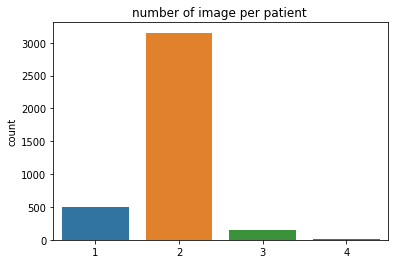

In [ ]:
# checking the number of images or x-rays per patient
d=dict()
for patient in df["patient_id"]:
  if patient in d:
    d[patient]+=1
  else:
    d[patient]=1

count=list(d.values())
sns.countplot(count)
plt.title("number of image per patient ")

Most reports have two x-ray images associated with it. Some patients have 1 image assocaited with their report. Some has 3 or 4 x-ray images. If there are more than two images per patient, we randomly select two from the images. If there is only one image associated with a patient, then we duplicate the image.

In [ ]:
d=dict() #where key is the patient id and value is the images
d1=dict() # where key is the patient id and value is the report or findings
for row in range(df.shape[0]):
  if df.iloc[row]["patient_id"] in d:
    d[df.iloc[row]["patient_id"]].append(df.iloc[row]["image_id"])
  else:
    d[df.iloc[row]["patient_id"]]=[df.iloc[row]["image_id"]]

  d1[df.iloc[row]["patient_id"]]=[df.iloc[row]["finding"]]

In [ ]:
#images and findings associated with the first patient
print(d["CXR3676_IM-1829-0001"])
print(d1["CXR3676_IM-1829-0001"])

['NLMCXR_png/CXR3676_IM-1829-0001-0001.png', 'NLMCXR_png/CXR3676_IM-1829-0001-0002.png']
["The cardiomediastinal silhouette appears irregular secondary to the diffuse bilateral pulmonary interstitial disease. The thoracic aorta is tortuous. Calcified lymph XXXX are demonstrated in the left hilum. No focal pulmonary consolidation. Diffuse increased bilateral pulmonary interstitial markings, consistent with the patient's history of known pulmonary fibrosis, with relative sparing of the bilateral lung apices. No pneumothorax or pleural effusion demonstrated. The thoracic spine appears intact."]


In [ ]:
image1=[]
image2=[]
report=[]
patient_id=[]
for patient in d.keys():

  #if there is only one image for a person
  if len(d[patient])==1:
    img1=d[patient][0]
    img2=d[patient][0]

  #if there are two images for a person
  elif len(d[patient])==2:
    img1=d[patient][0]
    img2=d[patient][1]
  
  #if there are three images for a person
  elif len(d[patient])==3:
    a=np.random.choice([0,1,2],2)
    img1=d[patient][a[0]]
    img2=d[patient][a[1]]

  #if there are four images for a person
  elif len(d[patient])==4:
    a=np.random.choice([0,1,2,3],2)
    img1=d[patient][a[0]]
    img2=d[patient][a[1]]
    
  image1.append(img1)
  image2.append(img2)
  report.append(d1[patient][0])
  patient_id.append(patient)

In [ ]:
df_dash=pd.DataFrame()
df_dash["patient_id"]=patient_id
df_dash["image1"]=image1
df_dash["image2"]=image2
df_dash["report"]=report
df_dash

,patient_id,image1,image2,report
0,CXR1964_IM-0629,NLMCXR_png/CXR1964_IM-0629-1001.png,NLMCXR_png/CXR1964_IM-0629-2001.png,Heart size and mediastinal contours appear wit...
1,CXR1982_IM-0639,NLMCXR_png/CXR1982_IM-0639-1001.png,NLMCXR_png/CXR1982_IM-0639-2001.png,Some XXXX opacities compatible with subsegment...
2,CXR1967_IM-0629,NLMCXR_png/CXR1967_IM-0629-1001.png,NLMCXR_png/CXR1967_IM-0629-3001.png,Heart size and pulmonary vascularity appear wi...
3,CXR1894_IM-0581,NLMCXR_png/CXR1894_IM-0581-1001.png,NLMCXR_png/CXR1894_IM-0581-2001.png,The heart is normal in size. The mediastinum i...
4,CXR1923_IM-0598,NLMCXR_png/CXR1923_IM-0598-1001.png,NLMCXR_png/CXR1923_IM-0598-2001.png,"Lungs are clear without focal consolidation, e..."
...,...,...,...,...
3811,CXR3751_IM-1875,NLMCXR_png/CXR3751_IM-1875-1001.png,NLMCXR_png/CXR3751_IM-1875-2001.png,The lungs are clear without evidence of focal ...
3812,CXR3707_IM-1851,NLMCXR_png/CXR3707_IM-1851-1001.png,NLMCXR_png/CXR3707_IM-1851-2001.png,There may be a subtle airspace opacity in the ...
3813,CXR3674_IM-1829-0001,NLMCXR_png/CXR3674_IM-1829-0001-0001.png,NLMCXR_png/CXR3674_IM-1829-0001-0002.png,No comparison chest x-XXXX. Well-expanded and ...
3814,CXR3724_IM-1860,NLMCXR_png/CXR3724_IM-1860-1001.png,NLMCXR_png/CXR3724_IM-1860-2001.png,Heart size normal. Lungs are clear. XXXX are n...


Now, we created a dataframe with two images per patient and the corresponding report as the finding

Preprocess Text

In [ ]:
# some sample report
print(df_dash["report"].values[:10])

['Heart size and mediastinal contours appear within normal limits. Pulmonary vascularity is within normal limits. No focal consolidation, suspicious pulmonary opacity, pneumothorax or definite pleural effusion. Visualized osseous structures appear intact.'
 'Some XXXX opacities compatible with subsegmental atelectasis/scarring noted projecting over region of right middle lobe/lingula on lateral view. Overall, well-expanded and clear lungs. Mediastinal contour within normal limits. No acute cardiopulmonary abnormality identified.'
 'Heart size and pulmonary vascularity appear within normal limits. The lungs are free of focal airspace disease. There has been interval development of some XXXX bandlike opacities in left base. These appear to be located in the lingula. The remainder of the lungs appear clear. No pneumothorax or pleural effusion is seen.'
 'The heart is normal in size. The mediastinum is unremarkable. Subtle increased opacity of right mid hemithorax XXXX related to superimpo

In [ ]:
#convert into lowercase
finding=df_dash["report"].values
for idx in tqdm(range(len(finding))):
    
    lower=finding[idx].lower()
    finding[idx]=lower
  
df_dash["report"]=finding


100%|██████████| 3816/3816 [00:00<00:00, 325917.12it/s]


In [ ]:
#Now we need to expand the contractions like won't, can't, don't etc.
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"i'd": "i had / i would",
"i'd've": "i would have",
"i'll": "i shall / I will",
"i'll've": "i shall have / i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

findings=df_dash["report"].values
for idx in tqdm(range(len(findings))):
  list_of_words=findings[idx].split(" ")
  
  sentence=""
  for i in list_of_words:
    
    if len(i)>2:
      
      if i in list(contractions.keys()):
        word=contractions[i]
      else:
        word=i
      
      sentence+=word+" "
    else:
      continue
  findings[idx]=sentence


100%|██████████| 3816/3816 [00:01<00:00, 3239.22it/s]


In [ ]:
### Now we remove all the special characters, and digits, the extra spaces , junk values xxx in the sentence. 

for idx in tqdm(range(len(finding))):
    
  report=re.sub("[^a-z.]"," ",finding[idx])
  report=re.sub("xx+","",report)
  report=re.sub(r'\b\w{1,2}\b',"",report)
  report=re.sub("\s\s+"," ",report)
  finding[idx]=report 
print("\n")


100%|██████████| 3816/3816 [00:00<00:00, 35707.51it/s]

In [ ]:
for i in finding[:5]:
  print(i)

  

 eart size and mediastinal contours appear within normal limits. ulmonary vascularity within normal limits. focal consolidation suspicious pulmonary opacity pneumothorax definite pleural effusion. isualized osseous structures appear intact. 
 ome opacities compatible with subsegmental atelectasis scarring noted projecting over region right middle lobe lingula lateral view. verall well expanded and clear lungs. ediastinal contour within normal limits. acute cardiopulmonary abnormality identified. 
 eart size and pulmonary vascularity appear within normal limits. lungs are free focal airspace disease. here has been interval development some bandlike opacities left base. hese appear located the lingula. remainder the lungs appear clear. pneumothorax pleural effusion seen. 
 heart normal size. mediastinum unremarkable. ubtle increased opacity right mid hemithorax related superimposed soft tissues. lungs are otherwise clear. here pleural effusion pneumothorax. 
 ungs are clear without focal

In [ ]:
df_dash["report"]=finding
df_dash.to_csv("data_final.csv")